# Simple ANN implimentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')

In [3]:
#Loading the data

ROOT_DIR = 'MNIST'
train_data = datasets.MNIST(
    root = ROOT_DIR,
    train = True,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True
)

test_data = datasets.MNIST(
    root = ROOT_DIR,
    train = False,
    transform = transforms.ToTensor(),
    target_transform = None,
    download = True
)

In [4]:
train_data.data.dtype

torch.uint8

In [5]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
train_data.targets.dtype

torch.int64

In [10]:
train_data.data.shape

torch.Size([60000, 28, 28])

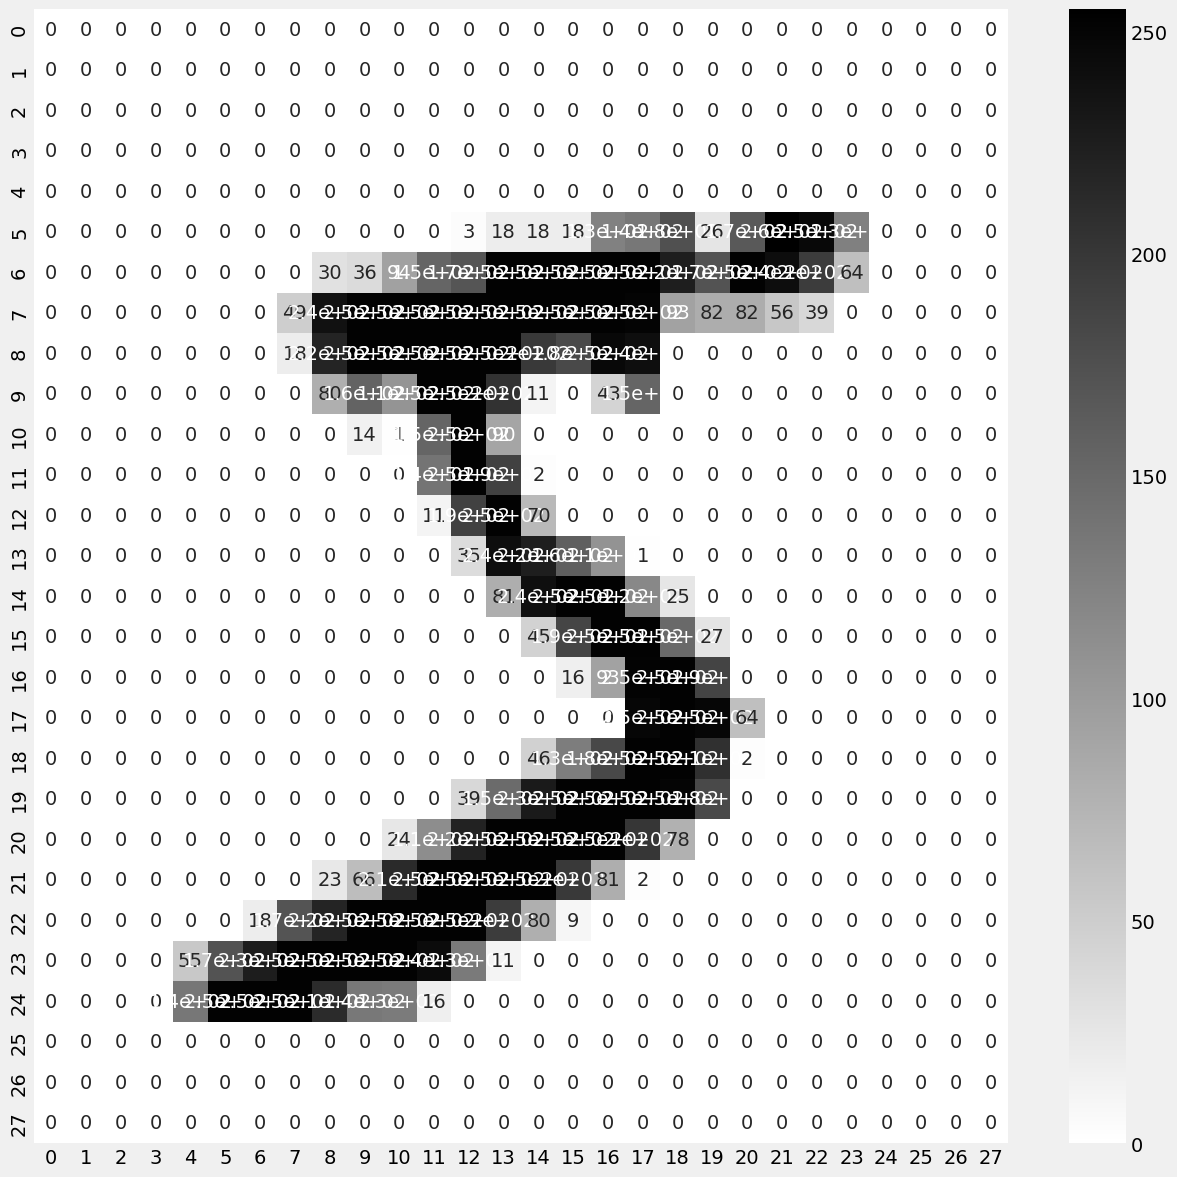

In [15]:
plt.figure(figsize=(14,14))
sns.heatmap(train_data.data[0], annot=True ,cmap="binary")
plt.savefig("sample.png")

In [16]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [19]:

Batch = 128

train_data_loader = DataLoader(dataset=train_data, 
                               batch_size=Batch, 
                               shuffle=True)

test_data_loader = DataLoader(dataset=test_data, 
                            batch_size=Batch)



In [20]:
for x in test_data_loader:
    print(x[0].shape)
    print(x[1].shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [21]:
Device = "cuda" if torch.cuda.is_available() else 'cpu'
Device

'cpu'

In [28]:
#  Lets define the model

class NeuralNetwork(nn.Module):
    def __init__(self, in_ , out_):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
        
        nn.Linear(in_, 256),
        nn.ReLU(),
        
        nn.Linear(256, 128),
        nn.ReLU(),
        
        nn.Linear(128, out_)
        
        )
    
    def forward(self, x):
        return self.layers(x)
    

In [29]:
model = NeuralNetwork(784, 10)
model.to(Device)
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [37]:
CE_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [38]:
## Training loop
EPOCHS = 10
loss_ = list()
acc_ = list()


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}/{EPOCHS}")
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(Device)
        y = data[1].to(Device)
        
        optimizer.zero_grad()
        
        y_pred = model(x.reshape(-1, 784))
        
        loss = CE_loss(y_pred, y)
        
        loss_.append(loss.item())
        loss.backward()
        optimizer.step()
        
        accuracy = torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        acc_.append(accuracy)
        
        if batch%100 == 0:
            print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epoch: 1/10
   Batch: 0, Loss: 2.2785 Accuracy 0.1562
   Batch: 100, Loss: 0.3128 Accuracy 0.8984
   Batch: 200, Loss: 0.1615 Accuracy 0.9531
   Batch: 300, Loss: 0.3382 Accuracy 0.9141
   Batch: 400, Loss: 0.1311 Accuracy 0.9609
Epoch: 2/10
   Batch: 0, Loss: 0.1700 Accuracy 0.9531
   Batch: 100, Loss: 0.2069 Accuracy 0.9297
   Batch: 200, Loss: 0.1732 Accuracy 0.9531
   Batch: 300, Loss: 0.1346 Accuracy 0.9688
   Batch: 400, Loss: 0.0862 Accuracy 0.9688
Epoch: 3/10
   Batch: 0, Loss: 0.0709 Accuracy 0.9844
   Batch: 100, Loss: 0.0733 Accuracy 0.9609
   Batch: 200, Loss: 0.0463 Accuracy 0.9844
   Batch: 300, Loss: 0.0977 Accuracy 0.9766
   Batch: 400, Loss: 0.0609 Accuracy 0.9766
Epoch: 4/10
   Batch: 0, Loss: 0.0437 Accuracy 0.9844
   Batch: 100, Loss: 0.0929 Accuracy 0.9609
   Batch: 200, Loss: 0.0296 Accuracy 0.9922
   Batch: 300, Loss: 0.0183 Accuracy 0.9922
   Batch: 400, Loss: 0.0551 Accuracy 0.9844
Epoch: 5/10
   Batch: 0, Loss: 0.0592 Accuracy 0.9688
   Batch: 100, Loss: 0.068

<Figure size 2000x2000 with 0 Axes>

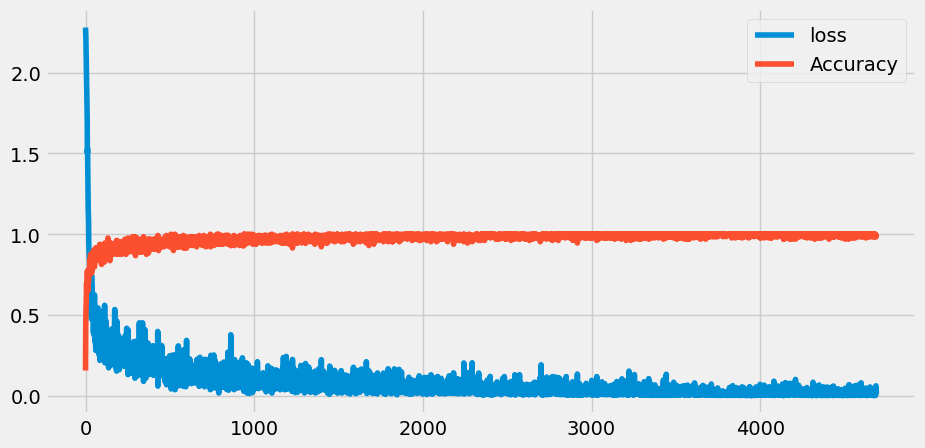

In [45]:
#plot the training and testing accuracy
plt.figure(figsize=(20,20))
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10, 5))
plt.show()

In [47]:
test_loss = 0
test_acc = 0

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(Device)
        y = data[1].to(Device)
        
        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)
        
        test_loss +=loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) ==y).float()).item()
        batch+=1
        

In [48]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.0742, test accuracy: 0.9796
